In [1]:
pip install yellowbrick

In [2]:
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [4]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [5]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
path = r"C:\Users\kssin\Downloads\WESAD\S11\S11.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

In [6]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(3663100, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7674  0.4226  1.7662  0.020096 -0.013870  6.607437  33.520264   
1        0.7326  0.2878  1.7234  0.036850 -0.002014  6.603241  33.494537   
2        0.6894  0.1146  1.5550  0.053650 -0.007599  6.605530  33.508148   
3        0.6646 -0.0626  1.3322  0.052780 -0.026505  6.611252  33.491516   
4        0.6590 -0.2322  1.0834  0.035751 -0.040421  6.609726  33.524780   
...         ...     ...     ...       ...       ...       ...        ...   
3663095  0.8854  0.0582 -0.3068 -0.027145 -0.045914  6.463242  35.029724   
3663096  0.8830  0.0570 -0.3114 -0.032822 -0.047928  6.377792  34.989563   
3663097  0.8814  0.0550 -0.3190 -0.026779 -0.045502  6.378174  35.014282   
3663098  0.8766  0.0546 -0.3256 -0.006821 -0.041977  6.377029  35.018921   
3663099  0.8714  0.0554 -0.3284  0.016434 -0.020828  6.380081  35.023529   

           c_resp  w_label  
0        2.120972      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7674  0.4226  1.7662  0.020096 -0.013870  6.607437  33.520264   
1        0.7326  0.2878  1.7234  0.036850 -0.002014  6.603241  33.494537   
2        0.6894  0.1146  1.5550  0.053650 -0.007599  6.605530  33.508148   
3        0.6646 -0.0626  1.3322  0.052780 -0.026505  6.611252  33.491516   
4        0.6590 -0.2322  1.0834  0.035751 -0.040421  6.609726  33.524780   
...         ...     ...     ...       ...       ...       ...        ...   
3663095  0.8854  0.0582 -0.3068 -0.027145 -0.045914  6.463242  35.029724   
3663096  0.8830  0.0570 -0.3114 -0.032822 -0.047928  6.377792  34.989563   
3663097  0.8814  0.0550 -0.3190 -0.026779 -0.045502  6.378174  35.014282   
3663098  0.8766  0.0546 -0.3256 -0.006821 -0.041977  6.377029  35.018921   
3663099  0.8714  0.0554 -0.3284  0.016434 -0.020828  6.380081  35.023529   

           c_resp  w_label  
0        2.120972      0

## Concatenate classes 0, 1, 2, 3, and 4
Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated¶

In [9]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [10]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.7674,0.4226,1.7662,0.020096,-0.013870,6.607437,33.520264,2.120972,0.0
1,0.7326,0.2878,1.7234,0.036850,-0.002014,6.603241,33.494537,2.113342,0.0
2,0.6894,0.1146,1.5550,0.053650,-0.007599,6.605530,33.508148,2.122498,0.0
3,0.6646,-0.0626,1.3322,0.052780,-0.026505,6.611252,33.491516,2.125549,0.0
4,0.6590,-0.2322,1.0834,0.035751,-0.040421,6.609726,33.524780,2.131653,0.0
...,...,...,...,...,...,...,...,...,...
3561332,0.8858,0.0022,-0.2758,0.077454,0.000595,6.375504,35.069885,-7.658386,4.0
3561333,0.8854,0.0036,-0.2738,0.080063,-0.005173,6.364059,35.060608,-7.655334,4.0
3561334,0.8842,0.0030,-0.2698,0.081436,0.007553,6.369400,35.065277,-7.658386,4.0
3561335,0.8850,0.0054,-0.2718,0.082626,0.002151,6.370926,35.051361,-7.667542,4.0


In [11]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,3556701.0,0.883466,0.026205,0.297800,0.867600,0.883600,0.898400,2.037600
c_ay,3556701.0,0.013238,0.054229,-0.826200,-0.012400,0.010400,0.043800,0.499400
c_az,3556701.0,-0.220440,0.111337,-1.547000,-0.288600,-0.239000,-0.180600,2.610800
c_ecg,3556701.0,0.001062,0.298621,-0.878952,-0.113113,-0.042252,0.036484,1.499954
c_emg,3556701.0,-0.003607,0.013215,-0.359894,-0.010391,-0.003479,0.003159,0.335724
c_eda,3556701.0,6.500956,0.419819,5.626297,6.251526,6.394196,6.617737,8.166885
c_temp,3556701.0,34.686744,0.331836,33.438599,34.546509,34.692352,34.967987,35.238495
c_resp,3556701.0,0.047712,4.859344,-36.196899,-2.066040,-0.065613,2.256775,30.084229
w_label,3556701.0,1.339894,1.454284,0.000000,0.000000,1.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

3663100 3556701
Number of Rows Removed: 106399


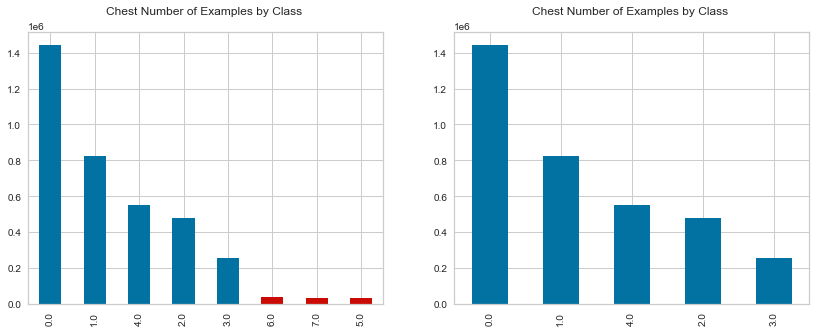

In [12]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.030000
c_ay       0.054600
c_az       0.105600
c_ecg      0.149185
c_emg      0.013596
c_eda      0.374985
c_temp     0.418396
c_resp     4.327393
w_label    3.000000
dtype: float64


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2317609, 9)


In [15]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [16]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
99041,0.142790,0.854619,0.252606,0.159372,-0.380836,0.153660,-2.826770,-0.800117,-0.341727
99242,0.142790,0.849954,0.266897,1.385632,-0.304142,0.122794,-2.853895,-0.856381,-0.341727
99373,-0.011348,0.919915,0.204020,-1.850435,-0.098027,0.173791,-2.783412,-0.792221,-0.341727
99573,0.255824,0.938571,0.289760,0.068910,-1.454550,0.141582,-2.832326,-0.591349,-0.341727
99786,0.050305,1.050507,0.346921,0.338468,-0.970420,0.134872,-2.805091,-0.436871,-0.341727


In [17]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06,2.317609e+06
mean,8.536769e-14,1.795798e-13,2.903456e-15,-4.429899e-16,-5.067127e-15,-2.816714e-14,3.215918e-12,-8.778617e-16,4.859007e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.816634e+00,-2.676044e+00,-2.688282e+00,-2.960191e+00,-2.859007e+00,-2.392191e+00,-2.853895e+00,-2.793038e+00,-9.659771e-01
25%,-7.306490e-01,-6.285400e-01,-6.305178e-01,-6.611810e-01,-6.444711e-01,-8.582384e-01,-5.864549e-01,-6.757449e-01,-9.659771e-01
50%,6.058213e-02,-1.621370e-01,-1.318828e-02,-4.348197e-02,7.426919e-03,-7.717060e-02,-2.182800e-02,-5.092125e-02,-3.417266e-01
75%,6.565779e-01,6.633953e-01,5.755607e-01,6.276718e-01,6.401514e-01,4.891707e-01,9.017504e-01,6.765591e-01,9.067745e-01
max,3.338553e+00,2.412401e+00,3.347826e+00,2.995214e+00,2.830720e+00,2.875319e+00,1.845373e+00,2.805698e+00,3.403777e+00


In [18]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317609 entries, 99041 to 3663099
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 176.8 MB


In [19]:
norm_df_out.shape

(2317609, 9)

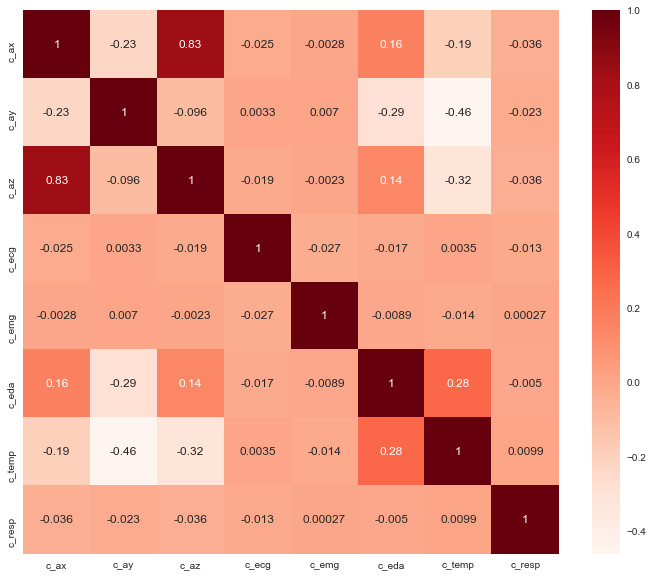

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      6.583964e-01
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     1.049781e-22
c_emg     6.994362e-01
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    4.545675e-34
dtype: float64

In [22]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2055690,1.571120,-0.003562,2.776226,0.563252,0.060154,2.170748,-0.400170,-1.754627
3369311,1.704709,-0.670516,1.733053,0.250291,-1.114221,0.016772,1.221375,-0.827756
2290653,0.615474,-0.110833,0.929953,1.173641,-1.401823,0.956201,0.769608,-0.486225
1097061,0.142790,0.071064,-0.030336,0.185871,-0.098027,-0.477099,-0.416620,0.180056
324334,-0.247687,0.980548,-0.090354,1.975005,-0.280175,-1.369556,-1.848069,0.556135
...,...,...,...,...,...,...,...,...
3159985,0.934021,-0.684508,-0.664814,0.892204,-0.701991,0.083874,0.945870,-2.063584
407146,-1.059479,1.675486,-0.573358,0.166225,0.338169,-1.458131,-1.608187,0.745655
3168124,0.522995,-0.157472,-0.387587,0.484212,-0.984800,-0.036909,1.182811,-0.183190
2969084,-1.470505,-0.427986,-1.505067,-0.110643,-0.495877,-0.211375,0.648578,-0.590856


In [23]:
norm_y_train

2055690    0.0
3369311    4.0
2290653    0.0
1097061    0.0
324334     1.0
          ... 
3159985    0.0
407146     1.0
3168124    0.0
2969084    3.0
2365703    0.0
Name: w_label, Length: 1854087, dtype: float64

In [24]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
162160,0.420233,1.862047,0.772763,0.195008,0.088914,-0.647538,-2.658460,0.025084
701873,0.029756,-0.497947,0.592709,-0.471120,1.474197,-1.015257,0.065976,-0.405284
3322962,-0.257965,-0.330042,-0.481902,0.033730,-0.625298,-0.077171,1.111130,1.573818
145784,0.553822,1.787422,1.192890,-1.095672,1.234529,-0.553595,-2.729161,0.459401
458363,0.553822,-0.050201,0.335488,-1.396755,0.352549,-1.268903,-1.411771,-0.722138
...,...,...,...,...,...,...,...,...
1360496,1.622502,0.406873,0.123996,0.876670,0.458003,0.424753,-0.668485,-0.331746
270581,0.481891,0.444186,0.512685,-0.927084,-0.548604,-1.287692,-1.978794,0.191901
2487716,-1.717128,0.117703,-1.396463,-0.096023,-0.328109,0.506617,1.094571,-1.238382
2285365,0.091408,1.437620,0.006818,-1.169229,1.205769,0.934728,0.852292,0.296532


In [25]:
norm_y_test

162160     1.0
701873     1.0
3322962    4.0
145784     1.0
458363     1.0
          ... 
1360496    2.0
270581     1.0
2487716    0.0
2285365    0.0
2638620    4.0
Name: w_label, Length: 463522, dtype: float64

In [26]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(1854087, 8)
(463522,)


99041      1.0
99242      1.0
99373      1.0
99573      1.0
99786      1.0
          ... 
3663085    0.0
3663086    0.0
3663091    0.0
3663092    0.0
3663099    0.0
Name: w_label, Length: 2317609, dtype: float64

In [27]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
911571,0.8584,-0.0038,-0.3302,-0.168137,-0.021194,6.208801,34.696960,-2.635193
600301,0.8790,0.0894,-0.2186,0.127029,-0.017441,6.017685,34.641663,3.376770
1198967,0.9176,-0.0066,-0.0306,-0.000046,-0.026733,6.454849,34.482147,-0.712585
2722257,0.8882,-0.0238,-0.2454,-0.024628,-0.001053,6.508255,34.977234,-1.182556
535629,0.8822,0.0514,-0.2614,-0.096359,0.002518,6.039047,34.494415,1.821899
...,...,...,...,...,...,...,...,...
3181140,0.8728,-0.0050,-0.2722,0.093704,-0.011856,6.338120,35.026611,-2.284241
2577666,0.8538,-0.0184,-0.3580,-0.179855,-0.011902,6.490707,34.912445,2.986145
1316653,0.8832,-0.0908,-0.1774,0.118515,-0.016800,6.481552,34.595642,1.585388
958210,0.8754,-0.0092,-0.2838,0.119797,0.010666,6.253433,34.653961,-0.056458


In [28]:
(y_train)

911571     0.0
600301     1.0
1198967    0.0
2722257    4.0
535629     1.0
          ... 
3181140    7.0
2577666    4.0
1316653    0.0
958210     0.0
374047     1.0
Name: w_label, Length: 1854087, dtype: float64

In [29]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2277486,0.8382,0.1118,-0.3510,-0.274338,0.021103,6.624985,34.941772,2.947998
3268550,0.8762,-0.0026,-0.3016,-0.154678,0.003708,6.332397,35.091492,-0.373840
454020,0.9006,0.0722,-0.1674,-0.071182,0.010666,5.998230,34.358154,-2.635193
2542671,0.8506,-0.0012,-0.3738,-0.038498,-0.005722,6.495667,34.964874,0.900269
328501,0.8734,-0.0090,-0.2246,-0.154587,-0.002701,5.995178,34.213013,-7.627869
...,...,...,...,...,...,...,...,...
664630,0.8730,0.0106,-0.2790,0.206497,0.014603,6.069565,34.666229,-1.091003
478894,0.8858,0.1012,-0.1874,-0.089996,0.008789,6.018829,34.396393,-4.045105
3323176,0.8750,0.0054,-0.2682,-0.171158,-0.003342,6.361389,34.955627,5.227661
765187,0.8878,0.0258,-0.2490,-0.156967,0.007050,6.118393,34.693878,-1.751709


In [30]:
(y_test)

2277486    0.0
3268550    0.0
454020     1.0
2542671    4.0
328501     1.0
          ... 
664630     1.0
478894     1.0
3323176    4.0
765187     1.0
2423121    0.0
Name: w_label, Length: 463522, dtype: float64

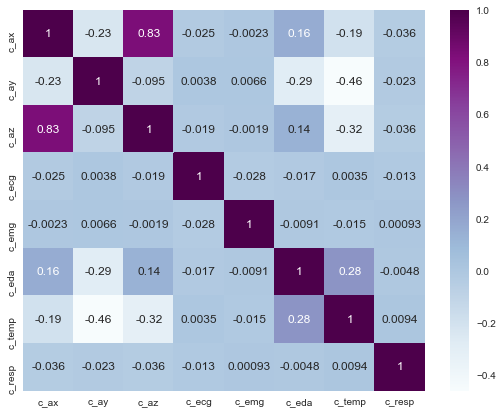

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

# XGBoost 
(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)

In [32]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [33]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16:59:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[16:59:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 376 extra nodes, 196 pruned nodes, max_depth=10
[16:59:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 408 extra nodes, 314 pruned nodes, max_depth=10
[16:59:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 552 extra nodes, 240 pruned nodes, max_depth=10
[16:59:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost

[17:00:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 248 extra nodes, 58 pruned nodes, max_depth=10
[17:00:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 224 pruned nodes, max_depth=10
[17:00:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 68 pruned nodes, max_depth=10
[17:00:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 30 pruned nodes, max_depth=10
[17:00:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e

[17:01:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 42 pruned nodes, max_depth=10
[8]	validation_0-merror:0.14080	validation_1-merror:0.14110
[17:01:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 366 pruned nodes, max_depth=10
[17:01:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 30 pruned nodes, max_depth=10
[17:01:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 330 extra nodes, 352 pruned nodes, max_depth=10
[17:01:38] INFO: C:/buildkite-ag

[17:02:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 328 pruned nodes, max_depth=10
[17:02:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 142 pruned nodes, max_depth=8
[17:02:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 222 pruned nodes, max_depth=10
[17:02:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 62 pruned nodes, max_depth=10
[17:02:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221

[17:03:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 44 pruned nodes, max_depth=9
[17:03:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 160 pruned nodes, max_depth=10
[17]	validation_0-merror:0.10346	validation_1-merror:0.10391
[17:03:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 374 extra nodes, 104 pruned nodes, max_depth=10
[17:03:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 28 pruned nodes, max_depth=10
[17:03:07] INFO: C:/buildkite-ag

[17:03:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 84 pruned nodes, max_depth=10
[17:03:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 212 pruned nodes, max_depth=8
[17:03:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 160 pruned nodes, max_depth=8
[17:03:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 336 extra nodes, 154 pruned nodes, max_depth=10
[17:03:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:04:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 46 pruned nodes, max_depth=7
[17:04:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 58 pruned nodes, max_depth=8
[17:04:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 18 pruned nodes, max_depth=4
[26]	validation_0-merror:0.08905	validation_1-merror:0.08929
[17:04:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 268 pruned nodes, max_depth=10
[17:04:59] INFO: C:/buildkite-agent/b

[17:06:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 164 pruned nodes, max_depth=10
[17:06:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 324 pruned nodes, max_depth=8
[17:06:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 98 pruned nodes, max_depth=9
[17:06:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 156 pruned nodes, max_depth=10
[17:06:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:06:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 220 pruned nodes, max_depth=10
[17:06:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 118 pruned nodes, max_depth=10
[17:06:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 56 pruned nodes, max_depth=8
[17:06:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 106 pruned nodes, max_depth=10
[35]	validation_0-merror:0.07906	validation_1-merror:0.07941
[17:06:57] INFO: C:/buildkite-age

[39]	validation_0-merror:0.07729	validation_1-merror:0.07766
[17:07:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 500 extra nodes, 200 pruned nodes, max_depth=10
[17:07:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 332 extra nodes, 200 pruned nodes, max_depth=10
[17:07:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 220 pruned nodes, max_depth=7
[17:07:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 142 pruned nodes, max_depth=10
[17:07:57] INFO: C:/buildkite

[17:09:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 160 pruned nodes, max_depth=9
[17:09:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 354 pruned nodes, max_depth=10
[17:09:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 48 pruned nodes, max_depth=9
[17:09:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 52 pruned nodes, max_depth=9
[17:09:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[17:09:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 64 pruned nodes, max_depth=10
[48]	validation_0-merror:0.06800	validation_1-merror:0.06866
[17:09:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 294 extra nodes, 256 pruned nodes, max_depth=10
[17:09:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 44 pruned nodes, max_depth=10
[17:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 224 pruned nodes, max_depth=7
[17:10:02] INFO: C:/buildkite-age

[17:11:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 196 pruned nodes, max_depth=10
[17:11:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 212 pruned nodes, max_depth=10
[17:11:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 248 extra nodes, 176 pruned nodes, max_depth=10
[17:11:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 88 pruned nodes, max_depth=10
[17:11:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[17:12:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 58 pruned nodes, max_depth=6
[17:12:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 104 pruned nodes, max_depth=9
[57]	validation_0-merror:0.06121	validation_1-merror:0.06209
[17:12:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 298 pruned nodes, max_depth=9
[17:12:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 214 pruned nodes, max_depth=7
[17:12:06] INFO: C:/buildkite-agent/

[17:12:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 120 pruned nodes, max_depth=10
[17:12:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 182 pruned nodes, max_depth=10
[17:12:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 240 pruned nodes, max_depth=10
[17:12:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 122 pruned nodes, max_depth=10
[17:12:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0302

[17:13:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 32 pruned nodes, max_depth=10
[17:13:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 38 pruned nodes, max_depth=9
[17:13:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 98 pruned nodes, max_depth=10
[66]	validation_0-merror:0.05770	validation_1-merror:0.05856
[17:13:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 124 pruned nodes, max_depth=10
[17:13:49] INFO: C:/buildkite-agen

[17:14:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 206 extra nodes, 460 pruned nodes, max_depth=10
[17:14:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 184 pruned nodes, max_depth=8
[17:14:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 358 pruned nodes, max_depth=10
[17:14:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 258 pruned nodes, max_depth=10
[17:14:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[17:15:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 548 pruned nodes, max_depth=10
[17:15:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 26 pruned nodes, max_depth=10
[17:15:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 64 pruned nodes, max_depth=10
[17:15:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 108 pruned nodes, max_depth=10
[75]	validation_0-merror:0.05421	validation_1-merror:0.05516
[17:15:45] INFO: C:/buildkite-a

[79]	validation_0-merror:0.05328	validation_1-merror:0.05402
[17:16:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 346 pruned nodes, max_depth=9
[17:16:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 186 pruned nodes, max_depth=10
[17:16:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 138 pruned nodes, max_depth=5
[17:16:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 218 pruned nodes, max_depth=10
[17:16:35] INFO: C:/buildkite-a

[17:17:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 134 pruned nodes, max_depth=10
[17:17:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 520 pruned nodes, max_depth=10
[17:17:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 64 pruned nodes, max_depth=9
[17:17:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 88 pruned nodes, max_depth=8
[17:17:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[17:18:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 82 pruned nodes, max_depth=10
[88]	validation_0-merror:0.05080	validation_1-merror:0.05157
[17:18:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 464 pruned nodes, max_depth=8
[17:18:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 200 pruned nodes, max_depth=10
[17:18:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 296 pruned nodes, max_depth=9
[17:18:32] INFO: C:/buildkite-age

[17:19:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 46 pruned nodes, max_depth=10
[17:19:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 190 pruned nodes, max_depth=7
[17:19:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 126 pruned nodes, max_depth=10
[17:19:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 42 pruned nodes, max_depth=10
[17:19:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[17:20:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 34 pruned nodes, max_depth=6
[17:20:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 84 pruned nodes, max_depth=10
[97]	validation_0-merror:0.04824	validation_1-merror:0.04924
[17:20:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 370 pruned nodes, max_depth=8
[17:20:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 112 pruned nodes, max_depth=6
[17:20:27] INFO: C:/buildkite-agent/

[17:21:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 66 pruned nodes, max_depth=7
[17:21:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 192 pruned nodes, max_depth=3
[17:21:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 228 pruned nodes, max_depth=10
[17:21:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 134 pruned nodes, max_depth=10
[17:21:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[17:22:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 86 pruned nodes, max_depth=10
[17:22:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 36 pruned nodes, max_depth=3
[17:22:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 308 pruned nodes, max_depth=3
[106]	validation_0-merror:0.04638	validation_1-merror:0.04750
[17:22:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 274 pruned nodes, max_depth=10
[17:22:37] INFO: C:/buildkite-agent

[17:23:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 274 pruned nodes, max_depth=10
[17:23:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 356 pruned nodes, max_depth=10
[17:23:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 170 pruned nodes, max_depth=8
[17:23:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 242 pruned nodes, max_depth=7
[17:23:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:24:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 184 pruned nodes, max_depth=10
[17:24:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 102 pruned nodes, max_depth=10
[17:24:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 16 pruned nodes, max_depth=4
[17:24:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 96 pruned nodes, max_depth=9
[115]	validation_0-merror:0.04520	validation_1-merror:0.04639
[17:24:29] INFO: C:/buildkite-ag

[119]	validation_0-merror:0.04451	validation_1-merror:0.04571
[17:25:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 334 pruned nodes, max_depth=10
[17:25:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 44 pruned nodes, max_depth=7
[17:25:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 248 pruned nodes, max_depth=10
[17:25:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 198 pruned nodes, max_depth=10
[17:25:26] INFO: C:/buildkite-

[17:26:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 158 pruned nodes, max_depth=7
[17:26:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 298 extra nodes, 228 pruned nodes, max_depth=10
[17:26:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 134 pruned nodes, max_depth=10
[17:26:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 10 pruned nodes, max_depth=6
[17:26:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[17:27:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 108 pruned nodes, max_depth=7
[128]	validation_0-merror:0.04311	validation_1-merror:0.04433
[17:27:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 436 pruned nodes, max_depth=10
[17:27:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 170 pruned nodes, max_depth=10
[17:27:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 216 pruned nodes, max_depth=10
[17:27:19] INFO: C:/buildkite-

[17:28:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 330 pruned nodes, max_depth=8
[17:28:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 278 pruned nodes, max_depth=10
[17:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 278 extra nodes, 462 pruned nodes, max_depth=10
[17:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 126 pruned nodes, max_depth=7
[17:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:28:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 8 pruned nodes, max_depth=6
[17:28:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 72 pruned nodes, max_depth=9
[137]	validation_0-merror:0.04201	validation_1-merror:0.04325
[17:28:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 394 extra nodes, 196 pruned nodes, max_depth=10
[17:29:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 192 pruned nodes, max_depth=9
[17:29:02] INFO: C:/buildkite-agent

[17:30:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 134 pruned nodes, max_depth=10
[17:30:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 188 pruned nodes, max_depth=10
[17:30:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 204 pruned nodes, max_depth=10
[17:30:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 360 pruned nodes, max_depth=10
[17:30:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0302

[17:31:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 88 pruned nodes, max_depth=10
[17:31:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 30 pruned nodes, max_depth=3
[17:31:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 100 pruned nodes, max_depth=10
[146]	validation_0-merror:0.04063	validation_1-merror:0.04200
[17:31:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 448 pruned nodes, max_depth=10
[17:31:10] INFO: C:/buildkite-ag

[17:31:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 200 pruned nodes, max_depth=10
[17:31:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 182 pruned nodes, max_depth=9
[17:31:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 92 pruned nodes, max_depth=10
[17:31:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 270 pruned nodes, max_depth=10
[17:31:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e

[17:32:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 564 pruned nodes, max_depth=10
[17:32:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 104 pruned nodes, max_depth=10
[17:32:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 22 pruned nodes, max_depth=5
[17:32:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 98 pruned nodes, max_depth=10
[155]	validation_0-merror:0.03962	validation_1-merror:0.04119
[17:32:44] INFO: C:/buildkite-a

[159]	validation_0-merror:0.03912	validation_1-merror:0.04073
[17:33:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 270 extra nodes, 388 pruned nodes, max_depth=10
[17:33:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 206 pruned nodes, max_depth=8
[17:33:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 220 pruned nodes, max_depth=1
[17:33:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 244 pruned nodes, max_depth=9
[17:33:30] INFO: C:/buildkite-age

[17:34:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 374 pruned nodes, max_depth=10
[17:34:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 202 pruned nodes, max_depth=8
[17:34:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 168 pruned nodes, max_depth=3
[17:34:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 36 pruned nodes, max_depth=3
[17:34:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[17:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 92 pruned nodes, max_depth=4
[168]	validation_0-merror:0.03825	validation_1-merror:0.03984
[17:35:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 490 pruned nodes, max_depth=10
[17:35:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 50 pruned nodes, max_depth=10
[17:35:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 72 pruned nodes, max_depth=10
[17:35:11] INFO: C:/buildkite-age

[17:35:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 166 pruned nodes, max_depth=10
[17:36:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 216 extra nodes, 248 pruned nodes, max_depth=10
[17:36:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 466 pruned nodes, max_depth=10
[17:36:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 26 pruned nodes, max_depth=10
[17:36:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[17:36:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 38 pruned nodes, max_depth=1
[17:36:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 112 pruned nodes, max_depth=8
[177]	validation_0-merror:0.03728	validation_1-merror:0.03886
[17:36:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 462 pruned nodes, max_depth=10
[17:37:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 104 pruned nodes, max_depth=9
[17:37:02] INFO: C:/buildkite-agen

[17:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 222 pruned nodes, max_depth=6
[17:37:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 282 pruned nodes, max_depth=0
[17:37:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 300 pruned nodes, max_depth=10
[17:37:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 428 extra nodes, 566 pruned nodes, max_depth=10
[17:37:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:38:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 104 pruned nodes, max_depth=9
[17:38:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 44 pruned nodes, max_depth=3
[17:38:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 72 pruned nodes, max_depth=10
[186]	validation_0-merror:0.03653	validation_1-merror:0.03820
[17:38:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 298 pruned nodes, max_depth=10
[17:38:33] INFO: C:/buildkite-agen

[17:39:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 386 pruned nodes, max_depth=7
[17:39:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 104 pruned nodes, max_depth=10
[17:39:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 106 pruned nodes, max_depth=9
[17:39:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 214 pruned nodes, max_depth=10
[17:39:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:40:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 196 pruned nodes, max_depth=10
[17:40:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 92 pruned nodes, max_depth=10
[17:40:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 28 pruned nodes, max_depth=4
[17:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 204 pruned nodes, max_depth=7
[195]	validation_0-merror:0.03577	validation_1-merror:0.03744
[17:40:14] INFO: C:/buildkite-agent

[199]	validation_0-merror:0.03557	validation_1-merror:0.03728
[17:40:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 556 pruned nodes, max_depth=10
[17:40:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 128 pruned nodes, max_depth=10
[17:40:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 74 pruned nodes, max_depth=10
[17:41:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 230 pruned nodes, max_depth=10
[17:41:01] INFO: C:/buildkite

[17:41:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 228 pruned nodes, max_depth=10
[17:41:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 352 pruned nodes, max_depth=10
[17:41:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 116 pruned nodes, max_depth=10
[17:41:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 42 pruned nodes, max_depth=1
[17:41:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:42:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 132 pruned nodes, max_depth=9
[208]	validation_0-merror:0.03489	validation_1-merror:0.03661
[17:42:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 420 pruned nodes, max_depth=10
[17:42:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 82 pruned nodes, max_depth=8
[17:42:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 86 pruned nodes, max_depth=10
[17:42:33] INFO: C:/buildkite-agen

[17:43:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 130 pruned nodes, max_depth=9
[17:43:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 274 pruned nodes, max_depth=9
[17:43:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 422 pruned nodes, max_depth=10
[17:43:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 208 pruned nodes, max_depth=0
[17:43:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[17:44:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 30 pruned nodes, max_depth=3
[17:44:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 118 pruned nodes, max_depth=10
[217]	validation_0-merror:0.03438	validation_1-merror:0.03627
[17:44:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 572 pruned nodes, max_depth=10
[17:44:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 92 pruned nodes, max_depth=8
[17:44:32] INFO: C:/buildkite-agen

[17:45:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 78 pruned nodes, max_depth=8
[17:45:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 100 pruned nodes, max_depth=4
[17:45:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 284 pruned nodes, max_depth=10
[17:45:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 214 pruned nodes, max_depth=10
[17:45:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:45:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 40 pruned nodes, max_depth=10
[17:46:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 46 pruned nodes, max_depth=1
[17:46:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 206 pruned nodes, max_depth=7
[226]	validation_0-merror:0.03374	validation_1-merror:0.03571
[17:46:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 432 pruned nodes, max_depth=10
[17:46:04] INFO: C:/buildkite-agen

[17:47:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 238 pruned nodes, max_depth=9
[17:47:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 322 pruned nodes, max_depth=10
[17:47:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 92 pruned nodes, max_depth=3
[17:47:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 38 pruned nodes, max_depth=1
[17:47:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[17:48:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 132 pruned nodes, max_depth=9
[239]	validation_0-merror:0.03323	validation_1-merror:0.03527
[17:48:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 316 pruned nodes, max_depth=1
[17:48:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 110 pruned nodes, max_depth=8
[17:48:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 114 pruned nodes, max_depth=3
[17:48:13] INFO: C:/buildkite-agent/

[17:48:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 168 pruned nodes, max_depth=10
[17:48:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 260 pruned nodes, max_depth=9
[17:48:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 586 pruned nodes, max_depth=10
[17:48:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 86 pruned nodes, max_depth=9
[17:48:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[17:49:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 38 pruned nodes, max_depth=0
[17:49:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 156 pruned nodes, max_depth=3
[248]	validation_0-merror:0.03273	validation_1-merror:0.03485
[17:49:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 646 pruned nodes, max_depth=10
[17:49:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 82 pruned nodes, max_depth=5
[17:49:39] INFO: C:/buildkite-agent/

[17:50:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 124 pruned nodes, max_depth=10
[17:50:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 196 pruned nodes, max_depth=9
[17:50:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 312 pruned nodes, max_depth=9
[17:50:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 368 pruned nodes, max_depth=10
[17:50:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[17:50:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 86 pruned nodes, max_depth=4
[17:51:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 22 pruned nodes, max_depth=3
[17:51:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 60 pruned nodes, max_depth=10
[257]	validation_0-merror:0.03214	validation_1-merror:0.03425
[17:51:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 472 pruned nodes, max_depth=10
[17:51:04] INFO: C:/buildkite-agent/

[17:51:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 476 pruned nodes, max_depth=10
[17:51:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 62 pruned nodes, max_depth=9
[17:51:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 100 pruned nodes, max_depth=2
[17:51:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 256 pruned nodes, max_depth=4
[17:51:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[17:52:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 270 pruned nodes, max_depth=5
[17:52:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 158 pruned nodes, max_depth=0
[17:52:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 100 pruned nodes, max_depth=4
[17:52:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 156 pruned nodes, max_depth=4
[266]	validation_0-merror:0.03167	validation_1-merror:0.03382
[17:52:29] INFO: C:/buildkite-agent/

[270]	validation_0-merror:0.03146	validation_1-merror:0.03363
[17:53:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 392 pruned nodes, max_depth=10
[17:53:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 186 pruned nodes, max_depth=8
[17:53:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 136 pruned nodes, max_depth=8
[17:53:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 366 pruned nodes, max_depth=10
[17:53:15] INFO: C:/buildkite-a

[17:53:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 270 pruned nodes, max_depth=10
[17:53:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 134 pruned nodes, max_depth=9
[17:53:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 86 pruned nodes, max_depth=7
[17:53:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 28 pruned nodes, max_depth=0
[17:53:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[17:54:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 160 pruned nodes, max_depth=4
[279]	validation_0-merror:0.03119	validation_1-merror:0.03338
[17:54:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 478 pruned nodes, max_depth=10
[17:54:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 162 pruned nodes, max_depth=9
[17:54:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 68 pruned nodes, max_depth=3
[17:54:43] INFO: C:/buildkite-agent

[17:55:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 100 pruned nodes, max_depth=6
[17:55:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 226 pruned nodes, max_depth=10
[17:55:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 404 pruned nodes, max_depth=10
[17:55:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 94 pruned nodes, max_depth=4
[17:55:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[17:56:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 34 pruned nodes, max_depth=2
[17:56:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 40 pruned nodes, max_depth=10
[288]	validation_0-merror:0.03087	validation_1-merror:0.03311
[17:56:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 336 extra nodes, 626 pruned nodes, max_depth=10
[17:56:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 76 pruned nodes, max_depth=3
[17:56:06] INFO: C:/buildkite-agent/

[17:56:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 78 pruned nodes, max_depth=8
[17:56:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 92 pruned nodes, max_depth=3
[17:56:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 220 pruned nodes, max_depth=9
[17:56:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 120 pruned nodes, max_depth=9
[17:56:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46

[17:57:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 80 pruned nodes, max_depth=9
[17:57:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 44 pruned nodes, max_depth=2
[17:57:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 148 pruned nodes, max_depth=1
[297]	validation_0-merror:0.03044	validation_1-merror:0.03276
[17:57:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 564 pruned nodes, max_depth=10
[17:57:07] INFO: C:/buildkite-agent/b

In [34]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9458
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9648    0.9476    0.9561    154437
           1     0.9945    0.9969    0.9957    130718
           2     0.9877    0.9926    0.9902     54611
           3     0.9655    0.9709    0.9682     45882
           4     0.9274    0.9465    0.9369     64415
           5     0.8919    0.9286    0.9098      6119
           6     0.9527    0.9408    0.9467      1048
           7     0.7983    0.8428    0.8199      6292

    accuracy                         0.9673    463522
   macro avg     0.9353    0.9458    0.9404    463522
weighted avg     0.9675    0.9673    0.9673    463522



# QDA + Normalization + Cross Validation = 10

In [35]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7993    0.7059    0.7497    773070
         1.0     0.9561    0.8723    0.9123    651869
         2.0     0.8132    0.9185    0.8627    271090
         3.0     0.8773    0.9077    0.8922    230729
         4.0     0.7569    0.8778    0.8129    322729
         5.0     0.5808    0.9629    0.7245     31224
         6.0     0.4292    0.9476    0.5908      5246
         7.0     0.4731    0.8594    0.6102     31652

    accuracy                         0.8277   2317609
   macro avg     0.7107    0.8815    0.7694   2317609
weighted avg     0.8386    0.8277    0.8290   2317609



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8097    0.6865    0.7430    773070
         1.0     0.9490    0.9537    0.9513    651869
         2.0     0.8697    0.9363    0.9017    271090
         3.0     0.8362    0.8623    0.8491    230729
         4.0     0.7220    0.8376    0.7755    322729
         5.0     0.4565    0.8003    0.5814     31224
         6.0     0.2348    0.4077    0.2980      5246
         7.0     0.4570    0.5629    0.5044     31652

    accuracy                         0.8286   2317609
   macro avg     0.6668    0.7559    0.7005   2317609
weighted avg     0.8354    0.8286    0.8288   2317609



# Individual and Combined Features 
Model shortChest: Less Electromyogram and Model ACC TEMP EDA

### Model shortChest: Less Electromyogram

#### XGBoost 

In [37]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(2845360, 7)
(711341,)


In [38]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18:08:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[18:08:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 344 extra nodes, 172 pruned nodes, max_depth=10
[18:08:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 238 extra nodes, 68 pruned nodes, max_depth=10
[18:08:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 450 extra nodes, 170 pruned nodes, max_depth=10
[18:08:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/

[18:10:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 464 extra nodes, 232 pruned nodes, max_depth=10
[6]	validation_0-merror:0.07209	validation_1-merror:0.07233
[18:10:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 612 extra nodes, 154 pruned nodes, max_depth=10
[18:10:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 432 extra nodes, 200 pruned nodes, max_depth=10
[18:10:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 392 extra nodes, 416 pruned nodes, max_depth=10
[18:10:16] INFO: C:/buildkit

[18:11:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 378 extra nodes, 74 pruned nodes, max_depth=10
[13]	validation_0-merror:0.06945	validation_1-merror:0.06967
[18:11:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 362 extra nodes, 84 pruned nodes, max_depth=10
[18:11:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 240 extra nodes, 50 pruned nodes, max_depth=10
[18:11:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 400 extra nodes, 176 pruned nodes, max_depth=10
[18:11:57] INFO: C:/buildkite-

[18:13:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 464 extra nodes, 296 pruned nodes, max_depth=10
[20]	validation_0-merror:0.06491	validation_1-merror:0.06510
[18:13:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 526 extra nodes, 364 pruned nodes, max_depth=10
[18:13:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 228 extra nodes, 54 pruned nodes, max_depth=10
[18:13:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 104 pruned nodes, max_depth=10
[18:13:17] INFO: C:/buildkit

[18:14:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 470 extra nodes, 216 pruned nodes, max_depth=10
[27]	validation_0-merror:0.05779	validation_1-merror:0.05814
[18:14:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 318 extra nodes, 86 pruned nodes, max_depth=10
[18:14:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 114 pruned nodes, max_depth=10
[18:14:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 272 extra nodes, 498 pruned nodes, max_depth=10
[18:14:43] INFO: C:/buildkit

[18:15:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 258 extra nodes, 228 pruned nodes, max_depth=10
[34]	validation_0-merror:0.05416	validation_1-merror:0.05458
[18:16:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 506 extra nodes, 404 pruned nodes, max_depth=10
[18:16:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 202 extra nodes, 74 pruned nodes, max_depth=10
[18:16:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 198 extra nodes, 282 pruned nodes, max_depth=10
[18:16:07] INFO: C:/buildkit

[18:17:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 216 extra nodes, 252 pruned nodes, max_depth=10
[41]	validation_0-merror:0.04974	validation_1-merror:0.05019
[18:17:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 284 extra nodes, 134 pruned nodes, max_depth=10
[18:17:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 274 pruned nodes, max_depth=10
[18:17:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 478 pruned nodes, max_depth=10
[18:17:41] INFO: C:/buildki

[18:18:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 364 extra nodes, 176 pruned nodes, max_depth=10
[48]	validation_0-merror:0.04881	validation_1-merror:0.04932
[18:18:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 272 extra nodes, 104 pruned nodes, max_depth=10
[18:19:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 114 pruned nodes, max_depth=10
[18:19:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 94 pruned nodes, max_depth=10
[18:19:04] INFO: C:/buildkit

[18:20:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 192 extra nodes, 476 pruned nodes, max_depth=10
[55]	validation_0-merror:0.04489	validation_1-merror:0.04549
[18:20:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 322 extra nodes, 188 pruned nodes, max_depth=10
[18:20:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 124 pruned nodes, max_depth=10
[18:20:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 106 pruned nodes, max_depth=10
[18:20:45] INFO: C:/buildki

[18:22:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 258 extra nodes, 190 pruned nodes, max_depth=10
[62]	validation_0-merror:0.04285	validation_1-merror:0.04349
[18:22:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 138 pruned nodes, max_depth=10
[18:22:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 146 pruned nodes, max_depth=10
[18:22:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 90 pruned nodes, max_depth=10
[18:22:26] INFO: C:/buildkit

[18:23:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 400 pruned nodes, max_depth=10
[69]	validation_0-merror:0.04130	validation_1-merror:0.04197
[18:23:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 430 pruned nodes, max_depth=10
[18:24:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 132 pruned nodes, max_depth=10
[18:24:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 54 pruned nodes, max_depth=10
[18:24:08] INFO: C:/buildkite

[18:25:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 228 pruned nodes, max_depth=10
[76]	validation_0-merror:0.03955	validation_1-merror:0.04023
[18:25:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 248 extra nodes, 86 pruned nodes, max_depth=10
[18:25:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 134 pruned nodes, max_depth=10
[18:25:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 156 pruned nodes, max_depth=10
[18:25:49] INFO: C:/buildkite

[18:27:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 108 pruned nodes, max_depth=10
[83]	validation_0-merror:0.03791	validation_1-merror:0.03868
[18:27:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 210 extra nodes, 124 pruned nodes, max_depth=10
[18:27:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 226 pruned nodes, max_depth=9
[18:27:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 168 pruned nodes, max_depth=10
[18:27:21] INFO: C:/buildkite

[18:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 370 extra nodes, 308 pruned nodes, max_depth=10
[90]	validation_0-merror:0.03648	validation_1-merror:0.03728
[18:28:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 342 extra nodes, 122 pruned nodes, max_depth=10
[18:28:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 260 pruned nodes, max_depth=10
[18:28:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 82 pruned nodes, max_depth=10
[18:28:54] INFO: C:/buildkite

[18:30:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 148 pruned nodes, max_depth=10
[97]	validation_0-merror:0.03521	validation_1-merror:0.03605
[18:30:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 230 pruned nodes, max_depth=10
[18:30:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 142 pruned nodes, max_depth=10
[18:30:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 206 extra nodes, 94 pruned nodes, max_depth=10
[18:30:36] INFO: C:/buildkite

[18:31:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 204 pruned nodes, max_depth=10
[104]	validation_0-merror:0.03452	validation_1-merror:0.03535
[18:31:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 140 pruned nodes, max_depth=10
[18:31:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 254 pruned nodes, max_depth=10
[18:31:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 92 pruned nodes, max_depth=7
[18:32:02] INFO: C:/buildkite-

[18:33:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 196 pruned nodes, max_depth=10
[111]	validation_0-merror:0.03363	validation_1-merror:0.03447
[18:33:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 140 pruned nodes, max_depth=10
[18:33:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 66 pruned nodes, max_depth=8
[18:33:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 108 pruned nodes, max_depth=10
[18:33:37] INFO: C:/buildkite

[18:35:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 248 pruned nodes, max_depth=10
[118]	validation_0-merror:0.03277	validation_1-merror:0.03367
[18:35:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 540 pruned nodes, max_depth=10
[18:35:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 232 pruned nodes, max_depth=10
[18:35:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 490 pruned nodes, max_depth=9
[18:35:11] INFO: C:/buildkite

[18:36:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 320 pruned nodes, max_depth=10
[125]	validation_0-merror:0.03204	validation_1-merror:0.03292
[18:36:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 120 pruned nodes, max_depth=10
[18:36:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 136 pruned nodes, max_depth=10
[18:36:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 124 pruned nodes, max_depth=10
[18:37:00] INFO: C:/buildkit

[18:38:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 382 pruned nodes, max_depth=10
[132]	validation_0-merror:0.03130	validation_1-merror:0.03216
[18:38:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 268 extra nodes, 214 pruned nodes, max_depth=10
[18:38:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 184 pruned nodes, max_depth=10
[18:38:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 122 pruned nodes, max_depth=10
[18:38:33] INFO: C:/buildkit

[18:40:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 386 pruned nodes, max_depth=10
[139]	validation_0-merror:0.03054	validation_1-merror:0.03145
[18:40:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 328 extra nodes, 138 pruned nodes, max_depth=10
[18:40:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 106 pruned nodes, max_depth=7
[18:40:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 184 pruned nodes, max_depth=8
[18:40:15] INFO: C:/buildkite-

[18:41:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 172 pruned nodes, max_depth=10
[146]	validation_0-merror:0.02972	validation_1-merror:0.03069
[18:41:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 356 pruned nodes, max_depth=10
[18:42:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 358 pruned nodes, max_depth=10
[18:42:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 356 pruned nodes, max_depth=9
[18:42:06] INFO: C:/buildkite-

[18:43:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 138 pruned nodes, max_depth=10
[153]	validation_0-merror:0.02901	validation_1-merror:0.03004
[18:43:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 548 pruned nodes, max_depth=10
[18:43:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 140 pruned nodes, max_depth=10
[18:43:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 134 pruned nodes, max_depth=10
[18:43:44] INFO: C:/buildkit

[18:45:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 70 pruned nodes, max_depth=10
[160]	validation_0-merror:0.02846	validation_1-merror:0.02953
[18:45:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 500 pruned nodes, max_depth=10
[18:45:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 268 pruned nodes, max_depth=8
[18:45:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 160 pruned nodes, max_depth=10
[18:45:10] INFO: C:/buildkite

[18:46:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 162 pruned nodes, max_depth=10
[167]	validation_0-merror:0.02792	validation_1-merror:0.02903
[18:46:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 220 pruned nodes, max_depth=10
[18:46:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 262 pruned nodes, max_depth=8
[18:46:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 100 pruned nodes, max_depth=8
[18:46:36] INFO: C:/buildkite-

[18:48:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 404 extra nodes, 356 pruned nodes, max_depth=10
[174]	validation_0-merror:0.02736	validation_1-merror:0.02852
[18:48:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 226 extra nodes, 246 pruned nodes, max_depth=10
[18:48:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 112 pruned nodes, max_depth=10
[18:48:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 250 pruned nodes, max_depth=10
[18:48:15] INFO: C:/buildkit

[18:49:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 412 extra nodes, 352 pruned nodes, max_depth=10
[181]	validation_0-merror:0.02680	validation_1-merror:0.02800
[18:49:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 194 pruned nodes, max_depth=10
[18:49:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 162 pruned nodes, max_depth=7
[18:49:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 358 pruned nodes, max_depth=4
[18:50:01] INFO: C:/buildkite-

[18:51:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 522 extra nodes, 434 pruned nodes, max_depth=10
[188]	validation_0-merror:0.02632	validation_1-merror:0.02757
[18:51:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 172 pruned nodes, max_depth=10
[18:51:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 262 pruned nodes, max_depth=10
[18:51:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 124 pruned nodes, max_depth=9
[18:51:44] INFO: C:/buildkit

[18:53:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 354 extra nodes, 358 pruned nodes, max_depth=10
[195]	validation_0-merror:0.02586	validation_1-merror:0.02716
[18:53:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 538 pruned nodes, max_depth=10
[18:53:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 100 pruned nodes, max_depth=9
[18:53:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 236 pruned nodes, max_depth=10
[18:53:26] INFO: C:/buildkit

[18:55:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 192 pruned nodes, max_depth=10
[202]	validation_0-merror:0.02537	validation_1-merror:0.02673
[18:55:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 282 extra nodes, 228 pruned nodes, max_depth=10
[18:55:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 110 pruned nodes, max_depth=10
[18:55:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 398 pruned nodes, max_depth=7
[18:55:20] INFO: C:/buildkite

[18:56:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 416 pruned nodes, max_depth=10
[209]	validation_0-merror:0.02493	validation_1-merror:0.02620
[18:56:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 318 pruned nodes, max_depth=10
[18:56:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 116 pruned nodes, max_depth=10
[18:56:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 98 pruned nodes, max_depth=10
[18:56:50] INFO: C:/buildkite

[18:58:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 126 pruned nodes, max_depth=10
[216]	validation_0-merror:0.02444	validation_1-merror:0.02578
[18:58:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 184 pruned nodes, max_depth=10
[18:58:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 112 pruned nodes, max_depth=10
[18:58:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 106 pruned nodes, max_depth=10
[18:58:10] INFO: C:/buildkit

[18:59:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 318 pruned nodes, max_depth=10
[223]	validation_0-merror:0.02405	validation_1-merror:0.02540
[18:59:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 390 extra nodes, 354 pruned nodes, max_depth=10
[18:59:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 208 pruned nodes, max_depth=10
[18:59:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 84 pruned nodes, max_depth=7
[18:59:43] INFO: C:/buildkite

[19:01:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 412 pruned nodes, max_depth=10
[230]	validation_0-merror:0.02361	validation_1-merror:0.02502
[19:01:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 366 extra nodes, 452 pruned nodes, max_depth=10
[19:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 182 pruned nodes, max_depth=8
[19:01:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 246 pruned nodes, max_depth=10
[19:01:17] INFO: C:/buildkite

[19:02:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 150 pruned nodes, max_depth=8
[237]	validation_0-merror:0.02332	validation_1-merror:0.02466
[19:02:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 668 pruned nodes, max_depth=10
[19:02:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 136 pruned nodes, max_depth=8
[19:02:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 94 pruned nodes, max_depth=9
[19:02:33] INFO: C:/buildkite-agen

[19:03:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 352 pruned nodes, max_depth=10
[244]	validation_0-merror:0.02306	validation_1-merror:0.02450
[19:04:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 510 pruned nodes, max_depth=10
[19:04:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 118 pruned nodes, max_depth=6
[19:04:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 114 pruned nodes, max_depth=10
[19:04:07] INFO: C:/buildkite

[19:05:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 422 pruned nodes, max_depth=10
[251]	validation_0-merror:0.02277	validation_1-merror:0.02425
[19:05:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 414 extra nodes, 352 pruned nodes, max_depth=10
[19:05:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 134 pruned nodes, max_depth=7
[19:05:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 250 pruned nodes, max_depth=9
[19:05:49] INFO: C:/buildkite-

[19:06:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 148 pruned nodes, max_depth=10
[258]	validation_0-merror:0.02253	validation_1-merror:0.02406
[19:06:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 404 pruned nodes, max_depth=10
[19:07:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 94 pruned nodes, max_depth=8
[19:07:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 326 pruned nodes, max_depth=9
[19:07:10] INFO: C:/buildkite-a

[19:08:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 324 pruned nodes, max_depth=10
[265]	validation_0-merror:0.02236	validation_1-merror:0.02391
[19:08:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 278 extra nodes, 194 pruned nodes, max_depth=10
[19:08:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 116 pruned nodes, max_depth=10
[19:08:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 120 pruned nodes, max_depth=10
[19:08:34] INFO: C:/buildkit

[19:09:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 226 extra nodes, 368 pruned nodes, max_depth=10
[272]	validation_0-merror:0.02219	validation_1-merror:0.02375
[19:09:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 398 pruned nodes, max_depth=10
[19:09:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 182 pruned nodes, max_depth=10
[19:09:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 280 pruned nodes, max_depth=9
[19:09:59] INFO: C:/buildkite

[19:11:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 260 extra nodes, 220 pruned nodes, max_depth=10
[279]	validation_0-merror:0.02200	validation_1-merror:0.02357
[19:11:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 544 pruned nodes, max_depth=7
[19:11:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 242 pruned nodes, max_depth=7
[19:11:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 214 pruned nodes, max_depth=10
[19:11:15] INFO: C:/buildkite-

[19:12:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 690 pruned nodes, max_depth=10
[286]	validation_0-merror:0.02177	validation_1-merror:0.02333
[19:12:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 560 pruned nodes, max_depth=10
[19:12:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 214 pruned nodes, max_depth=9
[19:12:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 140 pruned nodes, max_depth=10
[19:12:42] INFO: C:/buildkite-

[19:13:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 404 pruned nodes, max_depth=10
[293]	validation_0-merror:0.02162	validation_1-merror:0.02315
[19:13:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 284 pruned nodes, max_depth=10
[19:13:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 150 pruned nodes, max_depth=4
[19:14:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 104 pruned nodes, max_depth=5
[19:14:02] INFO: C:/buildkite-

In [39]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9779636949642269
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9794    0.9663    0.9728    288628
           1     0.9942    0.9970    0.9956    165009
           2     0.9896    0.9932    0.9914     95451
           3     0.9633    0.9681    0.9657     51440
           4     0.9415    0.9653    0.9532    110813

    accuracy                         0.9770    711341
   macro avg     0.9736    0.9780    0.9757    711341
weighted avg     0.9771    0.9770    0.9770    711341



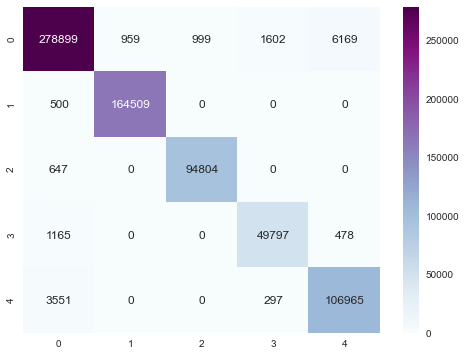

In [40]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


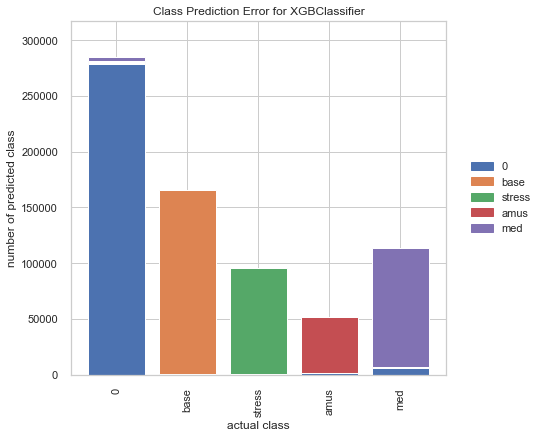

In [41]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [42]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 98.59%


#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [43]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [44]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(2715937, 8)


In [45]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [46]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      1.477113e-21
c_ay      0.000000e+00
c_az      0.000000e+00
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
c_ecg     4.237081e-05
dtype: float64

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8326    0.6653    0.7396    963917
         1.0     0.9091    0.9668    0.9371    772572
         2.0     0.7420    0.9297    0.8253    296522
         3.0     0.8144    0.8402    0.8271    242815
         4.0     0.7455    0.8504    0.7945    440111

    accuracy                         0.8256   2715937
   macro avg     0.8087    0.8505    0.8247   2715937
weighted avg     0.8287    0.8256    0.8218   2715937



#### QDA + Normalization + Cross Validation = 10

In [48]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8016    0.7316    0.7650    963917
         1.0     0.9037    0.8617    0.8822    772572
         2.0     0.8327    0.8757    0.8537    296522
         3.0     0.8473    0.8978    0.8718    242815
         4.0     0.7730    0.9315    0.8449    440111

    accuracy                         0.8316   2715937
   macro avg     0.8317    0.8597    0.8435   2715937
weighted avg     0.8335    0.8316    0.8305   2715937



### Model ACC TEMP EDA

#### XGBoost

In [32]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(2845360, 5)
(711341,)


In [33]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23:05:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[23:05:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 22 pruned nodes, max_depth=10
[23:05:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 14 pruned nodes, max_depth=10
[23:05:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 48 pruned nodes, max_depth=10
[23:05:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgb

[23:06:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 6 pruned nodes, max_depth=10
[6]	validation_0-merror:0.22839	validation_1-merror:0.22965
[23:06:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 26 pruned nodes, max_depth=10
[23:06:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 18 pruned nodes, max_depth=10
[23:06:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 52 pruned nodes, max_depth=8
[23:06:32] INFO: C:/buildkite-agent/

[23:07:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 78 pruned nodes, max_depth=10
[13]	validation_0-merror:0.17877	validation_1-merror:0.17964
[23:07:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 80 pruned nodes, max_depth=10
[23:07:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 18 pruned nodes, max_depth=8
[23:07:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 14 pruned nodes, max_depth=10
[23:07:22] INFO: C:/buildkite-agen

[23:08:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 36 pruned nodes, max_depth=10
[20]	validation_0-merror:0.14397	validation_1-merror:0.14470
[23:08:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 72 pruned nodes, max_depth=9
[23:08:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 30 pruned nodes, max_depth=8
[23:08:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 30 pruned nodes, max_depth=9
[23:08:11] INFO: C:/buildkite-agent/bu

[23:08:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 58 pruned nodes, max_depth=9
[27]	validation_0-merror:0.12642	validation_1-merror:0.12724
[23:08:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 60 pruned nodes, max_depth=10
[23:08:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 34 pruned nodes, max_depth=8
[23:08:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 12 pruned nodes, max_depth=8
[23:08:59] INFO: C:/buildkite-agent/b

[23:09:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 76 pruned nodes, max_depth=7
[34]	validation_0-merror:0.11593	validation_1-merror:0.11663
[23:09:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 70 pruned nodes, max_depth=8
[23:09:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 16 pruned nodes, max_depth=10
[23:09:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 30 pruned nodes, max_depth=9
[23:09:48] INFO: C:/buildkite-agent/bu

[23:10:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 44 pruned nodes, max_depth=10
[41]	validation_0-merror:0.10444	validation_1-merror:0.10519
[23:10:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 76 pruned nodes, max_depth=9
[23:10:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 34 pruned nodes, max_depth=7
[23:10:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 8 pruned nodes, max_depth=9
[23:10:38] INFO: C:/buildkite-agent/bui

[23:11:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 16 pruned nodes, max_depth=9
[48]	validation_0-merror:0.09683	validation_1-merror:0.09730
[23:11:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 52 pruned nodes, max_depth=10
[23:11:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 60 pruned nodes, max_depth=8
[23:11:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 68 pruned nodes, max_depth=5
[23:11:28] INFO: C:/buildkite-agent/b

[23:12:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 26 pruned nodes, max_depth=8
[55]	validation_0-merror:0.09290	validation_1-merror:0.09321
[23:12:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 68 pruned nodes, max_depth=10
[23:12:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 32 pruned nodes, max_depth=7
[23:12:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 66 pruned nodes, max_depth=7
[23:12:18] INFO: C:/buildkite-agent/bu

[23:13:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 44 pruned nodes, max_depth=10
[62]	validation_0-merror:0.08830	validation_1-merror:0.08849
[23:13:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 100 pruned nodes, max_depth=8
[23:13:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 76 pruned nodes, max_depth=8
[23:13:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 44 pruned nodes, max_depth=8
[23:13:07] INFO: C:/buildkite-agent/b

[23:13:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 30 pruned nodes, max_depth=10
[69]	validation_0-merror:0.08489	validation_1-merror:0.08520
[23:14:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 148 pruned nodes, max_depth=7
[23:14:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 30 pruned nodes, max_depth=10
[23:14:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 50 pruned nodes, max_depth=10
[23:14:05] INFO: C:/buildkite-agen

[23:14:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 98 pruned nodes, max_depth=9
[76]	validation_0-merror:0.08076	validation_1-merror:0.08096
[23:14:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 50 pruned nodes, max_depth=10
[23:14:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 62 pruned nodes, max_depth=7
[23:14:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 94 pruned nodes, max_depth=6
[23:14:53] INFO: C:/buildkite-agent/b

[23:15:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 112 pruned nodes, max_depth=10
[83]	validation_0-merror:0.07785	validation_1-merror:0.07794
[23:15:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 186 pruned nodes, max_depth=8
[23:15:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 28 pruned nodes, max_depth=8
[23:15:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 42 pruned nodes, max_depth=10
[23:15:41] INFO: C:/buildkite-agen

[23:16:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 46 pruned nodes, max_depth=10
[90]	validation_0-merror:0.07540	validation_1-merror:0.07556
[23:16:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 134 pruned nodes, max_depth=8
[23:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 50 pruned nodes, max_depth=10
[23:16:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 100 pruned nodes, max_depth=9
[23:16:39] INFO: C:/buildkite-agent

[23:17:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 42 pruned nodes, max_depth=10
[97]	validation_0-merror:0.07292	validation_1-merror:0.07296
[23:17:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 120 pruned nodes, max_depth=10
[23:17:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 32 pruned nodes, max_depth=5
[23:17:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 98 pruned nodes, max_depth=10
[23:17:29] INFO: C:/buildkite-agent

[23:18:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 136 pruned nodes, max_depth=8
[104]	validation_0-merror:0.07108	validation_1-merror:0.07112
[23:18:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 62 pruned nodes, max_depth=8
[23:18:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 16 pruned nodes, max_depth=8
[23:18:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 78 pruned nodes, max_depth=9
[23:18:18] INFO: C:/buildkite-agent/b

[23:19:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 108 pruned nodes, max_depth=6
[111]	validation_0-merror:0.06990	validation_1-merror:0.06994
[23:19:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 48 pruned nodes, max_depth=7
[23:19:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 64 pruned nodes, max_depth=6
[23:19:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 76 pruned nodes, max_depth=8
[23:19:08] INFO: C:/buildkite-agent/b

[23:19:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 142 pruned nodes, max_depth=7
[118]	validation_0-merror:0.06860	validation_1-merror:0.06869
[23:19:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 60 pruned nodes, max_depth=7
[23:19:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 64 pruned nodes, max_depth=6
[23:19:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 128 pruned nodes, max_depth=10
[23:19:58] INFO: C:/buildkite-agent

[23:20:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 30 pruned nodes, max_depth=8
[125]	validation_0-merror:0.06737	validation_1-merror:0.06748
[23:20:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 108 pruned nodes, max_depth=7
[23:20:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 74 pruned nodes, max_depth=6
[23:20:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 58 pruned nodes, max_depth=5
[23:20:56] INFO: C:/buildkite-agent/b

[23:21:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 88 pruned nodes, max_depth=9
[132]	validation_0-merror:0.06665	validation_1-merror:0.06672
[23:21:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 56 pruned nodes, max_depth=10
[23:21:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 28 pruned nodes, max_depth=8
[23:21:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 106 pruned nodes, max_depth=6
[23:21:46] INFO: C:/buildkite-agent

[23:22:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 40 pruned nodes, max_depth=7
[139]	validation_0-merror:0.06603	validation_1-merror:0.06621
[23:22:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 238 pruned nodes, max_depth=7
[23:22:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 48 pruned nodes, max_depth=5
[23:22:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 116 pruned nodes, max_depth=7
[23:22:33] INFO: C:/buildkite-agent/

[23:23:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 40 pruned nodes, max_depth=9
[146]	validation_0-merror:0.06551	validation_1-merror:0.06566
[23:23:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 226 pruned nodes, max_depth=7
[23:23:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 56 pruned nodes, max_depth=5
[23:23:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 10 pruned nodes, max_depth=6
[23:23:22] INFO: C:/buildkite-agent/b

[23:24:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 40 pruned nodes, max_depth=9
[153]	validation_0-merror:0.06438	validation_1-merror:0.06457
[23:24:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 98 pruned nodes, max_depth=8
[23:24:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 42 pruned nodes, max_depth=5
[23:24:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 92 pruned nodes, max_depth=10
[23:24:09] INFO: C:/buildkite-agent/b

[23:24:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 204 pruned nodes, max_depth=6
[160]	validation_0-merror:0.06351	validation_1-merror:0.06365
[23:24:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 80 pruned nodes, max_depth=10
[23:24:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 38 pruned nodes, max_depth=8
[23:24:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 10 pruned nodes, max_depth=5
[23:24:57] INFO: C:/buildkite-agent

[23:25:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 74 pruned nodes, max_depth=9
[167]	validation_0-merror:0.06302	validation_1-merror:0.06327
[23:25:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 100 pruned nodes, max_depth=8
[23:25:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 28 pruned nodes, max_depth=8
[23:25:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 70 pruned nodes, max_depth=9
[23:25:45] INFO: C:/buildkite-agent/b

[23:26:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 34 pruned nodes, max_depth=9
[174]	validation_0-merror:0.06252	validation_1-merror:0.06274
[23:26:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 102 pruned nodes, max_depth=10
[23:26:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 78 pruned nodes, max_depth=5
[23:26:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 68 pruned nodes, max_depth=9
[23:26:43] INFO: C:/buildkite-agent/

[23:27:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 136 pruned nodes, max_depth=6
[181]	validation_0-merror:0.06206	validation_1-merror:0.06222
[23:27:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 198 pruned nodes, max_depth=5
[23:27:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 72 pruned nodes, max_depth=5
[23:27:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 68 pruned nodes, max_depth=10
[23:27:31] INFO: C:/buildkite-agent

[23:28:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 144 pruned nodes, max_depth=6
[188]	validation_0-merror:0.06164	validation_1-merror:0.06182
[23:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 128 pruned nodes, max_depth=5
[23:28:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 28 pruned nodes, max_depth=8
[23:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 76 pruned nodes, max_depth=6
[23:28:20] INFO: C:/buildkite-agent/

[23:29:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 212 pruned nodes, max_depth=6
[195]	validation_0-merror:0.06120	validation_1-merror:0.06127
[23:29:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 294 pruned nodes, max_depth=7
[23:29:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 58 pruned nodes, max_depth=6
[23:29:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 72 pruned nodes, max_depth=10
[23:29:07] INFO: C:/buildkite-agent

[23:29:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 72 pruned nodes, max_depth=10
[202]	validation_0-merror:0.06090	validation_1-merror:0.06096
[23:29:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 268 pruned nodes, max_depth=8
[23:29:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 54 pruned nodes, max_depth=3
[23:29:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 78 pruned nodes, max_depth=6
[23:29:56] INFO: C:/buildkite-agent/

[23:30:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 208 pruned nodes, max_depth=7
[209]	validation_0-merror:0.06063	validation_1-merror:0.06076
[23:30:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 160 pruned nodes, max_depth=7
[23:30:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 74 pruned nodes, max_depth=6
[23:30:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 100 pruned nodes, max_depth=6
[23:30:56] INFO: C:/buildkite-agent

[23:31:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 36 pruned nodes, max_depth=7
[216]	validation_0-merror:0.06038	validation_1-merror:0.06052
[23:31:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 96 pruned nodes, max_depth=9
[23:31:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 30 pruned nodes, max_depth=8
[23:31:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 74 pruned nodes, max_depth=7
[23:31:46] INFO: C:/buildkite-agent/bu

[23:32:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 116 pruned nodes, max_depth=8
[223]	validation_0-merror:0.06007	validation_1-merror:0.06021
[23:32:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 168 pruned nodes, max_depth=7
[23:32:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 58 pruned nodes, max_depth=5
[23:32:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 74 pruned nodes, max_depth=10
[23:32:43] INFO: C:/buildkite-agent

[23:33:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 38 pruned nodes, max_depth=8
[230]	validation_0-merror:0.05972	validation_1-merror:0.05980
[23:33:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 102 pruned nodes, max_depth=7
[23:33:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 30 pruned nodes, max_depth=7
[23:33:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 52 pruned nodes, max_depth=9
[23:33:32] INFO: C:/buildkite-agent/b

[23:34:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 224 pruned nodes, max_depth=5
[237]	validation_0-merror:0.05937	validation_1-merror:0.05947
[23:34:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 138 pruned nodes, max_depth=10
[23:34:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 54 pruned nodes, max_depth=5
[23:34:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 12 pruned nodes, max_depth=5
[23:34:20] INFO: C:/buildkite-agent

[23:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 136 pruned nodes, max_depth=5
[244]	validation_0-merror:0.05903	validation_1-merror:0.05913
[23:35:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 78 pruned nodes, max_depth=7
[23:35:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 22 pruned nodes, max_depth=8
[23:35:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 82 pruned nodes, max_depth=4
[23:35:10] INFO: C:/buildkite-agent/b

[23:35:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 62 pruned nodes, max_depth=7
[251]	validation_0-merror:0.05885	validation_1-merror:0.05903
[23:35:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 188 pruned nodes, max_depth=6
[23:35:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 90 pruned nodes, max_depth=5
[23:35:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 96 pruned nodes, max_depth=5
[23:36:00] INFO: C:/buildkite-agent/b

[23:36:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 126 pruned nodes, max_depth=5
[258]	validation_0-merror:0.05859	validation_1-merror:0.05878
[23:36:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 92 pruned nodes, max_depth=5
[23:36:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 66 pruned nodes, max_depth=1
[23:36:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 8 pruned nodes, max_depth=6
[23:36:50] INFO: C:/buildkite-agent/bui

[23:37:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 110 pruned nodes, max_depth=6
[265]	validation_0-merror:0.05839	validation_1-merror:0.05856
[23:37:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 68 pruned nodes, max_depth=9
[23:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 78 pruned nodes, max_depth=1
[23:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 112 pruned nodes, max_depth=6
[23:37:39] INFO: C:/buildkite-agent/b

[23:38:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 142 pruned nodes, max_depth=8
[272]	validation_0-merror:0.05819	validation_1-merror:0.05830
[23:38:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 284 pruned nodes, max_depth=3
[23:38:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 36 pruned nodes, max_depth=8
[23:38:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 10 pruned nodes, max_depth=5
[23:38:29] INFO: C:/buildkite-agent/

[23:39:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 68 pruned nodes, max_depth=7
[279]	validation_0-merror:0.05798	validation_1-merror:0.05799
[23:39:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 140 pruned nodes, max_depth=10
[23:39:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 44 pruned nodes, max_depth=8
[23:39:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 96 pruned nodes, max_depth=5
[23:39:18] INFO: C:/buildkite-agent/

[23:39:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 158 pruned nodes, max_depth=7
[286]	validation_0-merror:0.05779	validation_1-merror:0.05778
[23:39:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 126 pruned nodes, max_depth=7
[23:39:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 40 pruned nodes, max_depth=7
[23:39:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 48 pruned nodes, max_depth=10
[23:40:00] INFO: C:/buildkite-agent

[23:40:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 142 pruned nodes, max_depth=7
[293]	validation_0-merror:0.05760	validation_1-merror:0.05758
[23:40:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 288 pruned nodes, max_depth=4
[23:40:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 60 pruned nodes, max_depth=4
[23:40:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 108 pruned nodes, max_depth=5
[23:40:36] INFO: C:/buildkite-agent

In [34]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.946679899025052
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9510    0.9140    0.9321    288235
           1     0.9893    0.9958    0.9925    165099
           2     0.9661    0.9731    0.9696     95252
           3     0.9131    0.9365    0.9246     51321
           4     0.8518    0.9141    0.8819    111434

    accuracy                         0.9425    711341
   macro avg     0.9343    0.9467    0.9401    711341
weighted avg     0.9436    0.9425    0.9427    711341



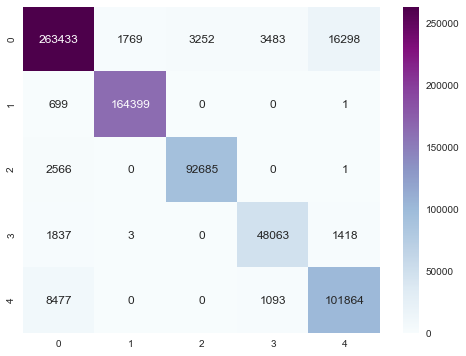

In [35]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


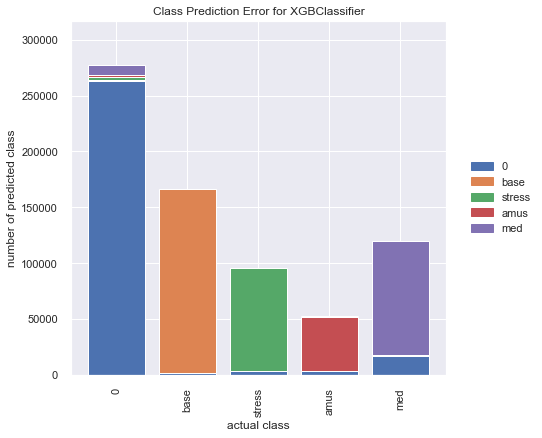

In [36]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [37]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 96.56%


In [38]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [39]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(2955692, 6)


In [40]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [41]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8400    0.6789    0.7509   1022082
         1.0     0.9305    0.9741    0.9518    803964
         2.0     0.7650    0.9537    0.8490    319145
         3.0     0.8308    0.8800    0.8547    257581
         4.0     0.7665    0.8558    0.8087    552920

    accuracy                         0.8395   2955692
   macro avg     0.8266    0.8685    0.8430   2955692
weighted avg     0.8420    0.8395    0.8360   2955692



#### QDA + Normalization + Cross Validation = 10

In [43]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7978    0.7217    0.7578   1022082
         1.0     0.9060    0.8624    0.8837    803964
         2.0     0.8348    0.8836    0.8585    319145
         3.0     0.8350    0.8851    0.8593    257581
         4.0     0.7786    0.9224    0.8444    552920

    accuracy                         0.8292   2955692
   macro avg     0.8304    0.8550    0.8407   2955692
weighted avg     0.8309    0.8292    0.8280   2955692

